In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_formats = ['svg'] # Makes the plots svg (visually better)
from svm import SVM
from test_data import TestLinear
import numpy as np
import matplotlib.pyplot as plt
import random

Using random seed: 675
(500, 1, 2) (1, 500, 2)
(500, 500)
Converged after 677 iterations: Difference between alpha updates = 1.1619389286001815e-07


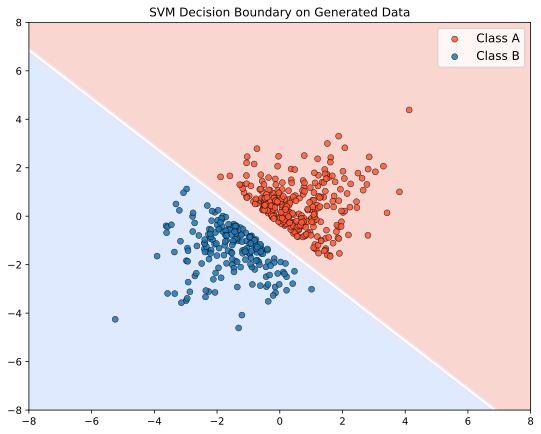

In [8]:
# Generate dataset
w = np.array([1.0, 1.0])
b = 1.0
n_A = 300
n_B = 200
margin = 0.5

random_seed = random.randint(0, 1000)
print(f"Using random seed: {random_seed}")

listA, listB = TestLinear(w, b, n_A, n_B, margin, seed=random_seed)

# Convert lists to numpy arrays
X_A = np.array(listA)
X_B = np.array(listB)
X = np.vstack((X_A, X_B))
y = np.hstack((np.ones(n_A), -np.ones(n_B)))  # Class A = +1, Class B = -1

# Train the SVM
svm = SVM(C=1.0, kernel="linear", lr=0.01, mode="dual", sigma=1.5, s=1.0)
svm.fit(X, y)

# Predict decision boundary
xx, yy = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
Z = np.c_[xx.ravel(), yy.ravel()]
preds = svm.predict(Z).reshape(xx.shape)

# Plot the results
plt.figure(figsize=(9, 7))
plt.contourf(xx, yy, preds, alpha=0.4, colors=["#AFCBFF", "#F19C8A"])
plt.contour(xx, yy, preds, levels=[0], linewidths=2, colors="white")
plt.scatter(X_A[:, 0], X_A[:, 1], color="#FF5733", label="Class A", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.scatter(X_B[:, 0], X_B[:, 1], color="#1F77B4", label="Class B", edgecolors="black", linewidth=0.5, alpha=0.85)
plt.legend(frameon=True, fontsize=12, loc="upper right")
plt.title("SVM Decision Boundary on Generated Data")
plt.show()